In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

import pytorch_lightning as L
from torch.utils.data import TensorDataset, DataLoader

https://www.youtube.com/watch?v=FHdlXe1bSe4&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=25

create a basic neural network structure

below based on this

In [3]:
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)
    
    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01
        
        input_to_bot_relu = input * self.w10 + self.b10
        bot_relu_output = F.relu(input_to_bot_relu)
        scaled_bot_relu_output = bot_relu_output * self.w11
        
        
        input_to_final_relu = scaled_top_relu_output + scaled_bot_relu_output + self.final_bias
        
        output = F.relu(input_to_final_relu)
        
        return output

In [4]:
input_doses = torch.linspace(start=0, end=1, steps=21)
model = BasicNN()
output_values = model(input_doses)

<Axes: xlabel='None', ylabel='None'>

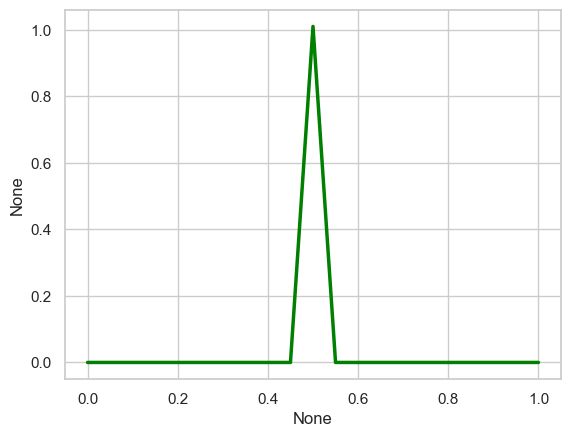

In [5]:
sns.set(style='whitegrid')
sns.lineplot(x=input_doses, y=output_values, color='green', linewidth=2.5)

below we will do some basic backpropagation implementation using pytorch's SGD

In [7]:
class BasicNN_train(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True)
    
    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01
        
        input_to_bot_relu = input * self.w10 + self.b10
        bot_relu_output = F.relu(input_to_bot_relu)
        scaled_bot_relu_output = bot_relu_output * self.w11
        
        
        input_to_final_relu = scaled_top_relu_output + scaled_bot_relu_output + self.final_bias
        
        output = F.relu(input_to_final_relu)
        
        return output

In [8]:
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])
model = BasicNN_train()

In [9]:
optimizer = SGD(model.parameters(), lr=0.1)

print('Final bias, before optimization:' + str(model.final_bias.data) + '\n')

Final bias, before optimization:tensor(0.)



In [10]:
for epoch in range(100):
    total_loss = 0
    
    for iteration in range(len(inputs)):
        
        input_i = inputs[iteration]
        label_i = labels[iteration]
        
        output_i = model(input_i)
        
        loss = (output_i - label_i) ** 2
        
        loss.backward()
        
        total_loss += float(loss)
    
    if (total_loss < 0.0001):
        print('Num steps: ' + str(epoch))
        break
    
    optimizer.step()
    optimizer.zero_grad()
    
    print('Step: ' + str(epoch) + ' Final Bias: ' + str(model.final_bias.data))

Step: 0 Final Bias: tensor(-3.2020)
Step: 1 Final Bias: tensor(-5.7636)
Step: 2 Final Bias: tensor(-7.8129)
Step: 3 Final Bias: tensor(-9.4523)
Step: 4 Final Bias: tensor(-10.7638)
Step: 5 Final Bias: tensor(-11.8131)
Step: 6 Final Bias: tensor(-12.6525)
Step: 7 Final Bias: tensor(-13.3240)
Step: 8 Final Bias: tensor(-13.8612)
Step: 9 Final Bias: tensor(-14.2909)
Step: 10 Final Bias: tensor(-14.6348)
Step: 11 Final Bias: tensor(-14.9098)
Step: 12 Final Bias: tensor(-15.1298)
Step: 13 Final Bias: tensor(-15.3059)
Step: 14 Final Bias: tensor(-15.4467)
Step: 15 Final Bias: tensor(-15.5594)
Step: 16 Final Bias: tensor(-15.6495)
Step: 17 Final Bias: tensor(-15.7216)
Step: 18 Final Bias: tensor(-15.7793)
Step: 19 Final Bias: tensor(-15.8254)
Step: 20 Final Bias: tensor(-15.8623)
Step: 21 Final Bias: tensor(-15.8919)
Step: 22 Final Bias: tensor(-15.9155)
Step: 23 Final Bias: tensor(-15.9344)
Step: 24 Final Bias: tensor(-15.9495)
Step: 25 Final Bias: tensor(-15.9616)
Step: 26 Final Bias: tenso

<Axes: xlabel='None', ylabel='None'>

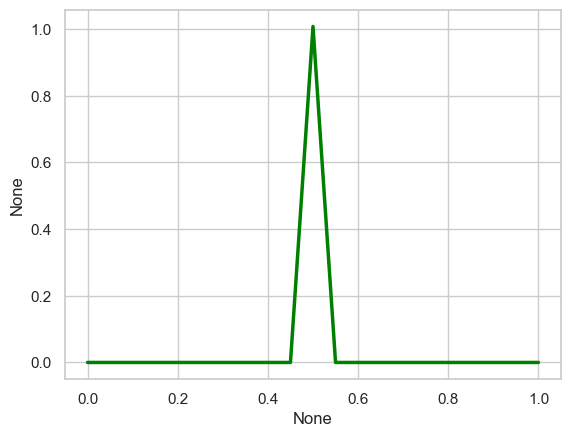

In [11]:
output_values = model(input_doses)
sns.set(style='whitegrid')
sns.lineplot(x=input_doses, y=output_values.detach(), color='green', linewidth=2.5)

below is based on this

https://www.youtube.com/watch?v=khMzi6xPbuM&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=26

we will use lightning now

In [13]:
class BasicLightning(L.LightningModule):
    def __init__(self):
        super().__init__()
        
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)
    
    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01
        
        input_to_bot_relu = input * self.w10 + self.b10
        bot_relu_output = F.relu(input_to_bot_relu)
        scaled_bot_relu_output = bot_relu_output * self.w11
        
        
        input_to_final_relu = scaled_top_relu_output + scaled_bot_relu_output + self.final_bias
        
        output = F.relu(input_to_final_relu)
        
        return output

<Axes: xlabel='None', ylabel='None'>

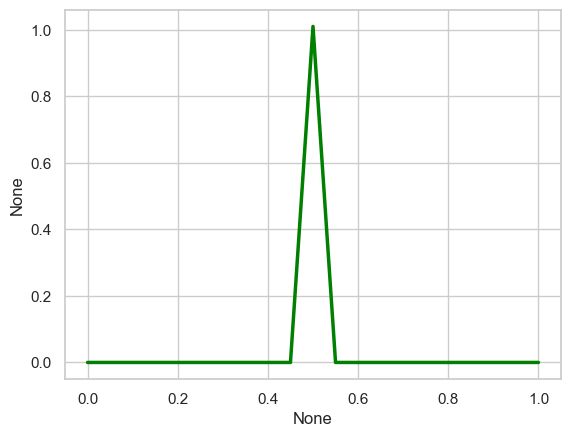

In [14]:
model = BasicLightning()

output_values = model(input_doses)

sns.set(style='whitegrid')
sns.lineplot(x=input_doses, y=output_values, color='green', linewidth=2.5)

In [15]:
class BasicLightningTrain(L.LightningModule):
    def __init__(self):
        super().__init__()
        
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True)

        self.learning_rate = 0.01
    
    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01
        
        input_to_bot_relu = input * self.w10 + self.b10
        bot_relu_output = F.relu(input_to_bot_relu)
        scaled_bot_relu_output = bot_relu_output * self.w11
        
        
        input_to_final_relu = scaled_top_relu_output + scaled_bot_relu_output + self.final_bias
        
        output = F.relu(input_to_final_relu)
        
        return output

    def configure_optimizers(self):
        return SGD(self.parameters(), lr=self.learning_rate)

    def training_step(self, batch, batch_idx):
        input_i, label_i = batch
        output_i = self.forward(input_i)
        loss = (output_i - label_i)**2
        
        return loss

<Axes: xlabel='None', ylabel='None'>

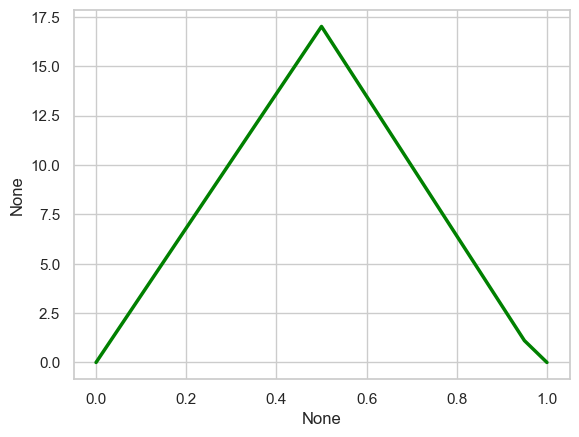

In [16]:
model = BasicLightningTrain()

output_values = model(input_doses)

sns.set(style='whitegrid')
sns.lineplot(x=input_doses, y=output_values.detach(), color='green', linewidth=2.5)

In [17]:
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])

dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset)

In [45]:
model = BasicLightningTrain()
trainer = L.Trainer(max_epochs=1_000)

tuner = L.tuner.Tuner(trainer)

lr_find_results = tuner.lr_find(model,
                                train_dataloaders=dataloader,
                                min_lr=0.001,
                                max_lr=1.0,
                                early_stop_threshold=None)

new_lr = lr_find_results.suggestion()
model.learning_rate = new_lr

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.002137962089502232
Restoring states from the checkpoint path at C:\Users\suchi\Projects\nn-basics\.lr_find_82d3dba3-7ec1-4c60-8e5e-3b4e8009fb0a.ckpt
Restored all states from the checkpoint at C:\Users\suchi\Projects\nn-basics\.lr_find_82d3dba3-7ec1-4c60-8e5e-3b4e8009fb0a.ckpt


In [47]:
trainer.fit(model, train_dataloaders=dataloader)


  | Name         | Type | Params | Mode
---------------------------------------------
  | other params | n/a  | 7      | n/a 
---------------------------------------------
1         Trainable params
6         Non-trainable params
7         Total params
0.000     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=1000` reached.


In [49]:
print(model.final_bias.data)

tensor(-15.7895)
